In [45]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Assuming two asset pools for simplicity of plotting,

# Uniswap v2

$$ f(x, y) = x * y $$


# Balancer

$$ f(x, y, w) = x^w y^{1-w} $$

where,

$$ w \in (0, 1) $$

# Curve finance

From whitepaper (Egorov, 2019)
$$ An^n\sum x_i + D = A D n^n + \dfrac{D^{n+1}}{n^n \prod x_i} $$

Simplifying for two assets,
$$  2\chi (x + y) + xy = 4 \chi s^2 + s^2$$

where $\chi$ is a dimensionless amplification factor, and $s^2 \equiv k$ 

In [65]:
def uniswap_v2(x: np.ndarray, k: float) -> np.ndarray:
    return k / x

def balancer(x: np.ndarray, k: float, w: float) -> np.ndarray:
    return (k / x**w)**(1 / (1 - w))  

def constant_sum(x: np.ndarray, k: float) -> np.ndarray:
    return k - x

def curve(x: np.ndarray, chi: float, s: float) -> np.ndarray:
    return (4 * chi * s**2 + s*+2 - 2 * chi * x) / (2 * chi * (1 + x))

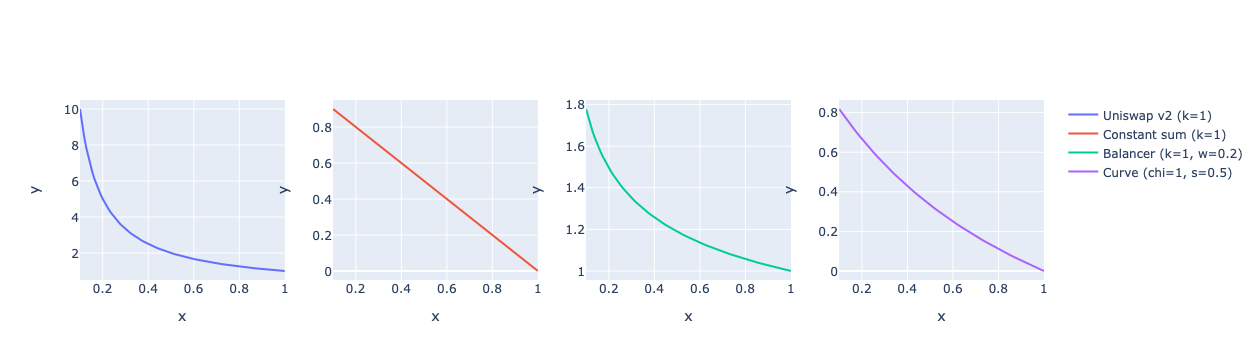

In [71]:
x = np.linspace(0.1, 1, 100)
fig = make_subplots(rows=1, cols=4)

k = 1
y = uniswap_v2(x, k)


fig.add_scatter(
    x=x,
    y=y,
    name=f"Uniswap v2 ({k=})",
    row=1,
    col=1
)

k = 1
y = constant_sum(x, k)

fig.add_scatter(
    x=x,
    y=y,
    name=f"Constant sum ({k=})",
    row=1,
    col=2
)


k, w = 1, 0.2
y = balancer(x, k, w)

fig.add_scatter(
    x=x,
    y=y,
    name=f"Balancer ({k=}, {w=})",
    row=1,
    col=3
)

chi, s = 1, 0.5
y = curve(x, chi, s)

fig.add_scatter(
    x=x,
    y=y,
    name=f"Curve ({chi=}, {s=})",
    row=1,
    col=4
)

fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="y")

# Parametrizing function space with an equilibrium (post arbitrage) function V

(taken from the brilliant paper by Angeris, Chitra and Evans, 2021)

- We can map $ f(x, y) \implies V(x, y, \textbf{p}) $, where $\textbf{p} $ depends on $(p_x, p_y)$ at equilibrium
- Conversely, we can also map $ V \implies f$

